<a href="https://colab.research.google.com/github/ABHAY1937/-ML/blob/main/Geopanda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv("new.csv")

In [ ]:
data.head(5)

CSV_File  Two_Year_Average_Ozone           State
0  CH003.csv               39.827445      Chandigarh
1  MP010.csv               31.460770  Madhya Pradesh
2  UP014.csv               54.470015   Uttar Pradesh
3  KA015.csv               33.485045       Karnataka
4  UP056.csv               22.482305   Uttar Pradesh

In [ ]:
data.columns

Index(['CSV_File', 'Two_Year_Average_Ozone', 'State'], dtype='object')

In [ ]:

df1 = pd.DataFrame(data)

# Sort the DataFrame by 'Two_Year_Average_Ozone' column in descending order
sorted_df = df1.sort_values(by='Two_Year_Average_Ozone', ascending=False)

print(sorted_df)

    CSV_File  Two_Year_Average_Ozone           State
164    MH009               75.654880     Maharashtra
108    MP019               75.113953  Madhya Pradesh
173    MP020               70.534743  Madhya Pradesh
222    OR005               69.393211          Odisha
41     CH002               64.671183      Chandigarh
..       ...                     ...             ...
258    AS004                5.669349           Assam
103    TN021                5.241074      Tamil Nadu
31     KL003                3.500655          Kerala
211    MH014                3.457116     Maharashtra
225    GJ003                2.183576         Gujarat

[259 rows x 3 columns]


In [ ]:
df = pd.DataFrame(data)

df['CSV_File'] = df['CSV_File'].str.replace('.csv', '')

print(df)


    CSV_File  Two_Year_Average_Ozone           State
0      CH003               39.827445      Chandigarh
1      MP010               31.460770  Madhya Pradesh
2      UP014               54.470015   Uttar Pradesh
3      KA015               33.485045       Karnataka
4      UP056               22.482305   Uttar Pradesh
..       ...                     ...             ...
254    BR005               29.145656           Bihar
255    AS005               29.460539           Assam
256    TG014               15.764491       Telangana
257    SK001               23.378773          Sikkim
258    AS004                5.669349           Assam

[259 rows x 3 columns]


<ipython-input-37-3c31e28ff371>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['CSV_File'] = df['CSV_File'].str.replace('.csv', '')


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
shp_gdf = gpd.read_file('/content/drive/MyDrive/Indian_States.shp')
shp_gdf.head()

st_nm                                           geometry
0  Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...
1        Arunanchal Pradesh  POLYGON ((96.16261 29.38078, 96.16860 29.37432...
2                     Assam  MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...
3                     Bihar  MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...
4                Chandigarh  POLYGON ((76.84147 30.75996, 76.83599 30.73623...

In [ ]:
merged_dataset = shp_gdf.set_index('st_nm').join(data.set_index('State'))
merged_dataset.head()

geometry  \
Andaman & Nicobar Island  MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...   
Andhra Pradesh            MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...   
Andhra Pradesh            MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...   
Andhra Pradesh            MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...   
Andhra Pradesh            MULTIPOLYGON (((81.10380 17.82269, 81.10610 17...   

                         CSV_File  Two_Year_Average_Ozone  
Andaman & Nicobar Island      NaN                     NaN  
Andhra Pradesh              AP007               54.080016  
Andhra Pradesh              AP008               27.813898  
Andhra Pradesh              AP001               21.436329  
Andhra Pradesh              AP005               37.126711

In [ ]:
merged_dataset.columns

Index(['geometry', 'CSV_File', 'Two_Year_Average_Ozone'], dtype='object')

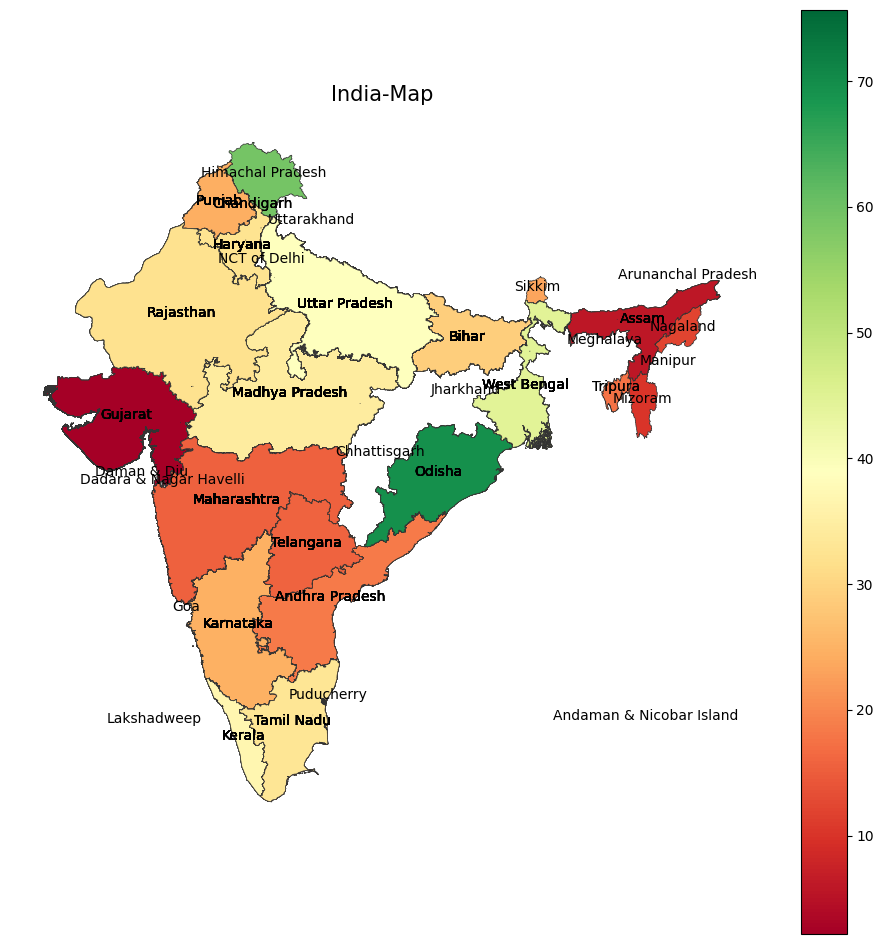

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Plotting the map
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('India-Map', fontdict={'fontsize': '15', 'fontweight': '3'})
merged_dataset.plot(column='Two_Year_Average_Ozone', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)

# Annotating state names
for idx, row in merged_dataset.iterrows():
    plt.annotate(text=idx, xy=(row.geometry.centroid.x, row.geometry.centroid.y), horizontalalignment='center')

plt.show()


<ipython-input-49-c0400c6cd52c>:21: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ax.scatter(high_ozone_data.geometry.centroid.x, high_ozone_data.geometry.centroid.y, s=100, c='red', marker='o', label='High Ozone')


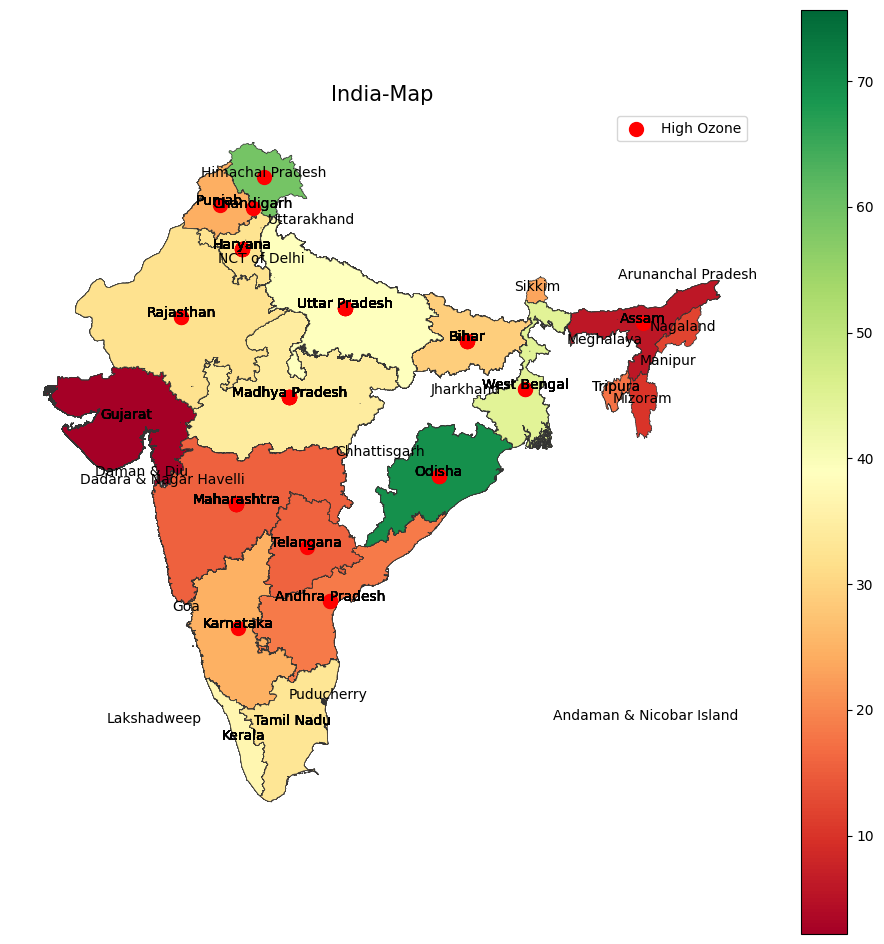

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define the threshold value for high ozone levels
threshold_value = 40  # For example

# Filter the dataset for high ozone values
high_ozone_data = merged_dataset[merged_dataset['Two_Year_Average_Ozone'] > threshold_value]

# Plotting the map
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('India-Map', fontdict={'fontsize': '15', 'fontweight': '3'})
merged_dataset.plot(column='Two_Year_Average_Ozone', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2', legend=True)

# Annotating state names
for idx, row in merged_dataset.iterrows():
    plt.annotate(text=idx, xy=(row.geometry.centroid.x, row.geometry.centroid.y), horizontalalignment='center')

# Plot scatter points for high ozone states
ax.scatter(high_ozone_data.geometry.centroid.x, high_ozone_data.geometry.centroid.y, s=100, c='red', marker='o', label='High Ozone')

plt.legend()
plt.show()
